In [1]:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
global_warming_parameters = pd.read_csv("Data/All_parameters.csv")
global_warming_parameters

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,GMSL,CO2_Increase,CSIRO Adjusted Sea Level,Glacier_mass
0,1880,0.0,3.0,233.0,0.0,0.0,2.785161e+09,-0.1148,-0.20,-0.470009,-158.7,NaN,0.000000,NaN
1,1881,0.0,4.0,239.0,0.0,0.0,1.374792e+09,-0.0628,-0.12,-0.356879,-153.1,NaN,0.220472,NaN
2,1882,0.0,4.0,252.0,0.0,0.0,1.384401e+09,-0.0648,-0.10,-0.372661,-169.9,NaN,-0.440945,NaN
3,1883,0.0,3.0,269.0,0.0,0.0,1.394147e+09,-0.1424,-0.21,-0.448443,-164.6,NaN,-0.232283,NaN
4,1884,0.0,4.0,271.0,0.0,0.0,1.403721e+09,-0.2009,-0.28,-0.589754,-143.7,NaN,0.590551,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2013,NaN,NaN,NaN,NaN,NaN,NaN,0.6679,0.65,0.584674,67.7,2.41,8.980315,-27.817
134,2014,NaN,NaN,NaN,NaN,NaN,NaN,0.7408,0.74,0.751255,NaN,2.04,NaN,-28.652
135,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.8998,0.87,0.935577,NaN,2.94,NaN,NaN
136,2016,NaN,NaN,NaN,NaN,NaN,NaN,0.9363,0.99,NaN,NaN,2.86,NaN,NaN


In [3]:
global_warming_parameters.columns

Index(['Year', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement',
       'Gas Flaring', 'population', 'GCAG_TEMP', 'GIS_TEMP',
       'Sea_anomaly_temp', 'GMSL', 'CO2_Increase', 'CSIRO Adjusted Sea Level',
       'Glacier_mass'],
      dtype='object')

In [4]:
global_warming_parameters_reduced = global_warming_parameters[79:131]
global_warming_parameters_reduced.head()

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,GMSL,CO2_Increase,CSIRO Adjusted Sea Level,Glacier_mass
79,1959,206.0,789.0,1382.0,40.0,36.0,8.938733e+09,0.0596,0.03,-0.273542,-48.0,0.96,4.358268,-8.325
80,1960,227.0,849.0,1410.0,43.0,39.0,9.104859e+09,0.0204,-0.02,-0.303577,-44.3,0.71,4.503937,-8.688
81,1961,240.0,904.0,1349.0,45.0,42.0,9.275526e+09,0.0775,0.05,-0.264251,-38.1,0.78,4.748031,-8.935
82,1962,263.0,980.0,1351.0,49.0,44.0,9.451249e+09,0.0888,0.03,-0.271703,-43.3,0.56,4.543307,-9.109
83,1963,286.0,1052.0,1396.0,51.0,47.0,9.633002e+09,0.1068,0.06,-0.260397,-44.9,0.57,4.480315,-9.567


In [5]:
#predicting sea level
X_sea_level=global_warming_parameters_reduced[[ 'Cement',
         'GIS_TEMP','population', 'Sea_anomaly_temp', 'CO2_Increase']]
y=global_warming_parameters_reduced["CSIRO Adjusted Sea Level"]

In [6]:
from sklearn.model_selection import train_test_split
X_train_sea_lvl, X_test_sea_lvl, y_train_sea_lvl, y_test_sea_lvl = train_test_split(X_sea_level, y, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
#modeling Tropical Depressions
model.fit(X_train_sea_lvl, y_train_sea_lvl)
training_score = model.score(X_train_sea_lvl, y_train_sea_lvl)
testing_score = model.score(X_test_sea_lvl, y_test_sea_lvl)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9743106456605448
Testing Score: 0.9799552016647906


Text(0.5, 1.0, 'Residual Plot')

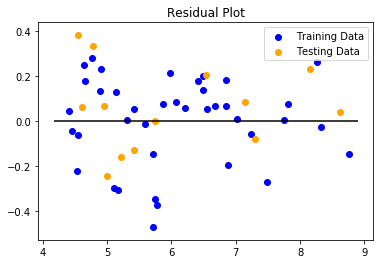

In [9]:
#Residuals
plt.scatter(model.predict(X_train_sea_lvl), model.predict(X_train_sea_lvl) - y_train_sea_lvl, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_sea_lvl), model.predict(X_test_sea_lvl) - y_test_sea_lvl, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [10]:
#get model coefficients

model.coef_
model.intercept_

2.9948396266599024

In [11]:
projected_values = pd.read_csv("Data/Forecasted_global_warming_values_for_models.csv")
projected_values

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,population,GCAG_TEMP,GIS_TEMP,Sea_anomaly_temp,GMSL,CO2_Increase,CSIRO Adjusted Sea Level,Glacier_mass
0,2011,1676.152632,3214.210526,3609.568421,418.336842,66.994737,2.108937e+10,0.707542,0.725947,0.605683,60.114737,2.293579,8.671343,-25.111584
1,2012,1708.262406,3250.635338,3688.622556,432.830827,68.818045,2.133100e+10,0.726380,0.746466,0.629196,63.290902,2.345872,8.800222,-25.705940
2,2013,1740.372180,3287.060150,3767.676692,447.324812,70.641353,2.157264e+10,0.745219,0.766985,0.652708,66.467068,2.398165,8.929101,-26.300295
3,2014,1772.481955,3323.484962,3846.730827,461.818797,72.464662,2.181427e+10,0.764058,0.787504,0.676221,69.643233,2.450459,9.057981,-26.894651
4,2015,1804.591729,3359.909774,3925.784962,476.312782,74.287970,2.205590e+10,0.782896,0.808023,0.699733,72.819398,2.502752,9.186860,-27.489007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2197,7648.570677,9989.225564,18313.637594,3114.218045,406.130075,6.603324e+10,4.211544,4.542444,4.978997,650.881504,12.020120,32.642890,-135.661733
187,2198,7680.680451,10025.650376,18392.691729,3128.712030,407.953383,6.627487e+10,4.230383,4.562962,5.002510,654.057669,12.072414,32.771769,-136.256089
188,2199,7712.790226,10062.075188,18471.745865,3143.206015,409.776692,6.651651e+10,4.249221,4.583481,5.026022,657.233835,12.124707,32.900648,-136.850444
189,2200,7744.900000,10098.500000,18550.800000,3157.700000,411.600000,6.675814e+10,4.268060,4.604000,5.049534,660.410000,12.177000,33.029528,-137.444800


In [12]:
projected_sea_lvls = []
for i in range(len(projected_values["Year"])):
    sea_lvl = ((model.coef_[0])*(projected_values["Cement"][i]) + (model.coef_[1])*(projected_values["GIS_TEMP"][i])\
               + (model.coef_[2])*(projected_values["population"][i]) + (model.coef_[3])*(projected_values["Sea_anomaly_temp"][i])\
               + (model.coef_[4])*(projected_values["CO2_Increase"][i]))+model.intercept_
    projected_sea_lvls.append(sea_lvl)

projected_sea_lvls

[8.647240529833233,
 8.769772579492003,
 8.892304629150775,
 9.014836678809534,
 9.137368728468303,
 9.259900778127072,
 9.382432827785832,
 9.504964877444602,
 9.627496927103376,
 9.750028976762145,
 9.872561026420904,
 9.995093076079675,
 10.117625125738442,
 10.240157175397202,
 10.362689225055973,
 10.485221274714743,
 10.607753324373501,
 10.730285374032253,
 10.852817423691022,
 10.97534947334978,
 11.09788152300855,
 11.220413572667319,
 11.342945622326091,
 11.46547767198485,
 11.588009721643619,
 11.710541771302388,
 11.83307382096115,
 11.95560587061992,
 12.078137920278692,
 12.200669969937454,
 12.32320201959622,
 12.44573406925499,
 12.568266118913762,
 12.690798168572517,
 12.813330218231286,
 12.935862267890059,
 13.058394317548817,
 13.180926367207586,
 13.303458416866356,
 13.425990466525114,
 13.548522516183887,
 13.67105456584266,
 13.793586615501418,
 13.916118665160187,
 14.038650714818957,
 14.161182764477722,
 14.283714814136484,
 14.40624686379526,
 14.528778913

In [13]:
#zip together above lists
projected_sea_lvl_info = list(zip(projected_values["Year"],projected_sea_lvls, projected_values["CSIRO Adjusted Sea Level"]))
#make a dataframe from zipped lists and rename columns
projected_sea_lvl_info = pd.DataFrame(projected_sea_lvl_info)
#rename columns
projected_sea_lvl_info = projected_sea_lvl_info.rename(columns = {0:"Year", 1:"Projected_Sea_Lvl", 2:"LinRegress_Sea_Lvl"})
projected_sea_lvl_info

,Year,Projected_Sea_Lvl,LinRegress_Sea_Lvl
0,2011,8.647241,8.671343
1,2012,8.769773,8.800222
2,2013,8.892305,8.929101
3,2014,9.014837,9.057981
4,2015,9.137369,9.186860
...,...,...,...
186,2197,31.438202,32.642890
187,2198,31.560734,32.771769
188,2199,31.683266,32.900648
189,2200,31.805798,33.029528


In [19]:
intermediate_df = global_warming_parameters[["Year", "CSIRO Adjusted Sea Level"]]
intermediate_df = intermediate_df[:131]
intermediate_df

,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614


In [27]:
intermediate_df = intermediate_df.rename(columns = {"CSIRO Adjusted Sea Level":"Projected_Sea_Lvl"})
intermediate_df_2 = pd.merge(intermediate_df,global_warming_parameters, on = "Year", how = "inner")
intermediate_df_2= intermediate_df_2[["Year", "Projected_Sea_Lvl", "CSIRO Adjusted Sea Level"]]
intermediate_df_2 = intermediate_df_2.rename(columns = {"CSIRO Adjusted Sea Level":"LinRegress_Sea_Lvl"})
intermediate_df_2

,Year,Projected_Sea_Lvl,LinRegress_Sea_Lvl
0,1880,0.000000,0.000000
1,1881,0.220472,0.220472
2,1882,-0.440945,-0.440945
3,1883,-0.232283,-0.232283
4,1884,0.590551,0.590551
...,...,...,...
126,2006,7.917323,7.917323
127,2007,7.996063,7.996063
128,2008,8.350394,8.350394
129,2009,8.586614,8.586614


In [28]:
sea_lvl_projections = pd.concat([intermediate_df_2, projected_sea_lvl_info], axis=0)
sea_lvl_projections

,Year,Projected_Sea_Lvl,LinRegress_Sea_Lvl
0,1880,0.000000,0.000000
1,1881,0.220472,0.220472
2,1882,-0.440945,-0.440945
3,1883,-0.232283,-0.232283
4,1884,0.590551,0.590551
...,...,...,...
186,2197,31.438202,32.642890
187,2198,31.560734,32.771769
188,2199,31.683266,32.900648
189,2200,31.805798,33.029528


In [33]:
year_start = 1870
years_reduce = []
for i in range(33):
    year_start = year_start+10
    years_reduce.append(year_start)
years_reduce

[1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010,
 2020,
 2030,
 2040,
 2050,
 2060,
 2070,
 2080,
 2090,
 2100,
 2110,
 2120,
 2130,
 2140,
 2150,
 2160,
 2170,
 2180,
 2190,
 2200]

In [37]:
sea_lvl_projections_reduce = sea_lvl_projections.loc[sea_lvl_projections["Year"].isin(years_reduce),:]
sea_lvl_projections_reduce = sea_lvl_projections_reduce.round(2)

In [38]:
sea_lvl_projections_reduce.to_csv("Data/Projected_Sea_lvl_reduced.csv", index = False)